In [1]:
cd c:\\Users\\drake\\Documents\\WGU\\Capstone\\AnalyticsCapstone\\

c:\Users\drake\Documents\WGU\Capstone\AnalyticsCapstone


In [2]:
#Explore the batter table
import sqlite3
import pandas as pd
from src.data.clean_data import get_batters_df, get_pitchers_df

In [3]:
#batters data
batters_df = get_batters_df()
batters_df.head()
print(batters_df.shape)

(189, 33)


In [4]:
batters_df.sort_values(by='salary', ascending=True).head()

,fullName,year,salary,team_name_abbr,comp_name_abbr,b_war,b_games,b_pa,b_ab,b_r,...,b_onbase_plus_slugging_plus,b_roba,b_rbat_plus,b_tb,b_gidp,b_hbp,b_sh,b_sf,b_ibb,pos
63,Jackson Merrill,2024,810000.0,SDP,NL,4.4,156,593,554,77,...,127,0.357,126,277,2,1,4,5,1,*8/H
138,Nicky Lopez,2024,850000.0,CHW,AL,0.2,124,445,398,40,...,75,0.282,83,117,3,4,6,0,0,46/H
175,Tyler Wade,2024,900000.0,SDP,NL,-0.7,90,156,138,28,...,50,0.250,43,33,0,2,4,0,0,H5467/9D8
41,Dylan Carlson,2024,975000.0,2TM,2LG,-1.2,96,265,235,19,...,61,0.256,58,65,2,5,0,3,0,798H/D
173,Ty France,2024,1000000.0,2TM,2LG,-0.6,140,535,479,46,...,92,0.301,95,175,16,13,0,5,0,*3/DH4


In [5]:
#pitchers data
pitchers_df = get_pitchers_df()
pitchers_df.head()
print(pitchers_df.shape)

(210, 36)


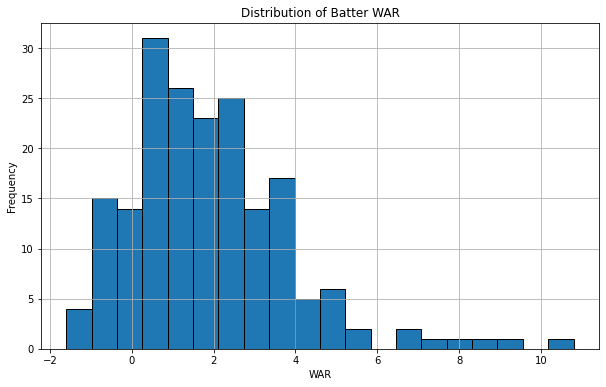

In [6]:
#Lets see the distrubtion of WAR for batters.
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(batters_df['b_war'], bins=20, edgecolor='black')
plt.xlabel('WAR')
plt.ylabel('Frequency')
plt.title('Distribution of Batter WAR')
plt.grid(True)
plt.show()

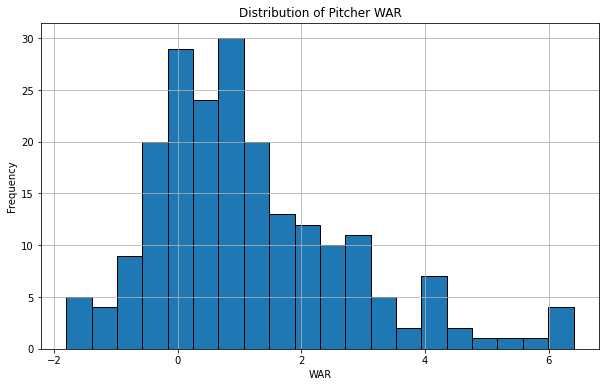

In [7]:
# Now for pitchers
plt.figure(figsize=(10,6))
plt.hist(pitchers_df['p_war'], bins=20, edgecolor='black')
plt.xlabel('WAR')
plt.ylabel('Frequency')
plt.title('Distribution of Pitcher WAR')
plt.grid(True)
plt.show()


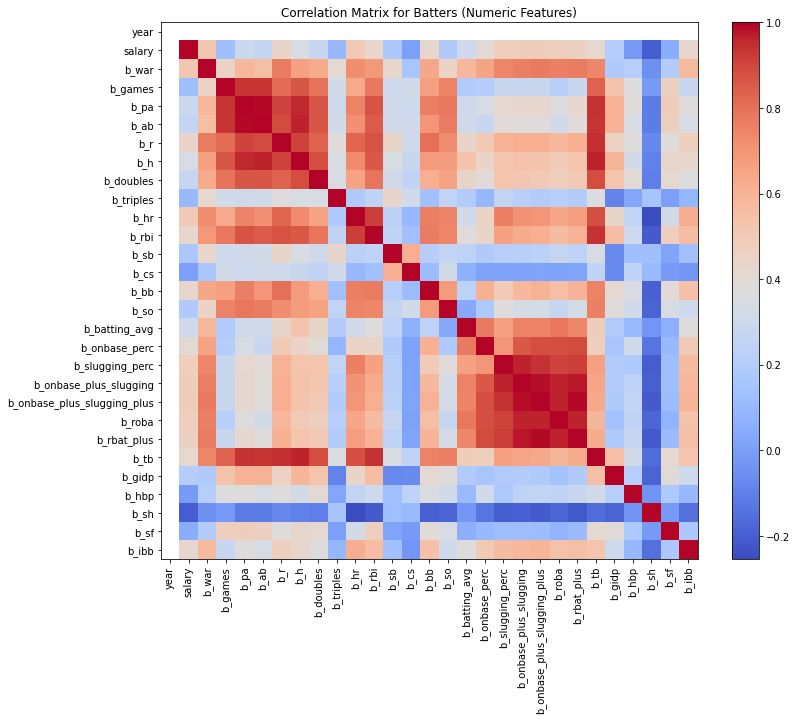

In [8]:
# I will generate a correlation matrix for the batters
# Select only numeric columns for correlation
batters_numeric = batters_df.select_dtypes(include='number')
corr_matrix = batters_numeric.corr()

plt.figure(figsize=(12,10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix for Batters (Numeric Features)')
plt.tight_layout()
plt.show()


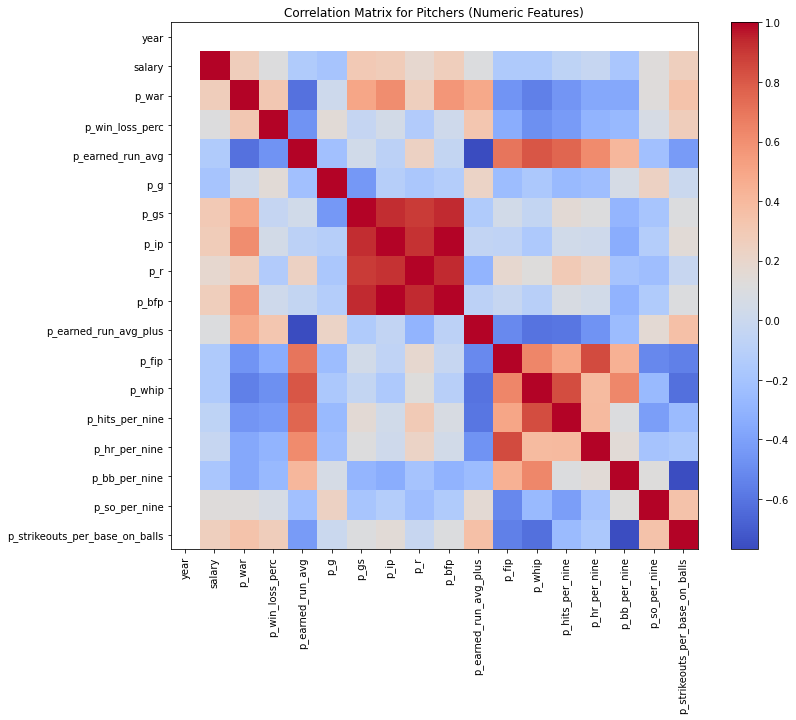

In [9]:
# And the same for the pitchers
pitchers_numeric = pitchers_df.select_dtypes(include='number')
corr_matrix = pitchers_numeric.corr()

plt.figure(figsize=(12,10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix for Pitchers (Numeric Features)')
plt.tight_layout()
plt.show()

There doesn't appear to be redundant columns in either dataframe, so we will keep all the numerical features for now.